In [28]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string

In [29]:
# Load the dataset as a pandas DataFrame
chr_analytic_csv_path = Path.cwd().parent / "data" / "chr_analytic_data2022.csv"
chr_analytic_df = pd.read_csv(chr_analytic_csv_path, skiprows=1)
chr_analytic_df

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
0,0,0,0,US,United States,2022,NaN,7281.935564,4125218.0,917267406.0,...,0.507545,167227921,329484123,NaN,NaN,0.192690,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,88086.0,13668498.0,...,0.517027,2544566,4921532,NaN,NaN,0.409632,1957932.0,4779736.0,NaN,NaN
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,836.0,156081.0,...,0.515077,28919,56145,NaN,NaN,0.420022,22921.0,54571.0,NaN,NaN
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,3377.0,614143.0,...,0.515891,118287,229287,NaN,NaN,0.422791,77060.0,182265.0,NaN,NaN
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,539.0,68126.0,...,0.471837,11602,24589,NaN,NaN,0.677896,18613.0,27457.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599.0,122399.0,...,0.483608,20637,42673,NaN,NaN,0.109163,4782.0,43806.0,NaN,NaN
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111.0,66036.0,...,0.481338,11310,23497,NaN,NaN,0.464309,9887.0,21294.0,NaN,NaN
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287.0,57690.0,...,0.493940,9985,20215,NaN,NaN,0.430959,9101.0,21118.0,NaN,NaN
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115.0,21075.0,...,0.490464,3806,7760,NaN,NaN,0.359545,3068.0,8533.0,NaN,NaN


In [30]:
# Generate a mapping that converts variable names to their descriptions
VAR_DESCRIPTION_MAPPING = dict((k, v) for (v, k) in pd.read_csv(chr_analytic_csv_path, nrows=1).iloc[0].items())

In [31]:
# Remove columns with more than 50% nan
chr_analytic_df.dropna(axis = 1, thresh = int(0.6 * len(chr_analytic_df)), inplace=True)
chr_analytic_df

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v059_numerator,v059_denominator,v059_cilow,v059_cihigh,v057_rawvalue,v057_numerator,v057_denominator,v058_rawvalue,v058_numerator,v058_denominator
0,0,0,0,US,United States,2022,NaN,7281.935564,4125218.0,917267406.0,...,12766829,306919116,0.041357,0.041836,0.507545,167227921,329484123,0.192690,NaN,NaN
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,88086.0,13668498.0,...,46887,4599254,0.009667,0.010722,0.517027,2544566,4921532,0.409632,1957932.0,4779736.0
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,836.0,156081.0,...,363,52404,0.001701,0.012153,0.515077,28919,56145,0.420022,22921.0,54571.0
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,3377.0,614143.0,...,1593,206329,0.004913,0.010529,0.515891,118287,229287,0.422791,77060.0,182265.0
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,539.0,68126.0,...,433,23694,0.007950,0.028599,0.471837,11602,24589,0.677896,18613.0,27457.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599.0,122399.0,...,321,40482,0.002901,0.012958,0.483608,20637,42673,0.109163,4782.0,43806.0
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111.0,66036.0,...,668,22310,0.014451,0.045433,0.481338,11310,23497,0.464309,9887.0,21294.0
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287.0,57690.0,...,237,18910,0.001921,0.023145,0.493940,9985,20215,0.430959,9101.0,21118.0
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115.0,21075.0,...,16,7491,0.000000,0.012753,0.490464,3806,7760,0.359545,3068.0,8533.0


In [32]:
# Get dataframe without categorical data
numeric_chr_analytic_df = chr_analytic_df.drop(["state", "county"], axis=1)
non_numerical_cols = [
    "statecode",
    "countycode",
    "fipscode",
    "v001_flag",
    "year",
    "county_ranked"
]
numeric_chr_analytic_df.drop(non_numerical_cols, axis = 1, inplace=True)

numeric_chr_analytic_df.interpolate(inplace=True)
# Replace remaining NaN with median of column
#imputer = SimpleImputer(missing_values=np.nan, strategy="median")
#imputer = imputer.fit(numeric_chr_analytic_df)
#numeric_chr_analytic_df = imputer.transform(numeric_chr_analytic_df)

numeric_chr_analytic_df



,v001_rawvalue,v001_numerator,v001_denominator,v001_cilow,v001_cihigh,v001_race_aian_flag,v001_race_asian_flag,v001_race_black_flag,v001_race_hispanic_flag,v001_race_white,...,v059_numerator,v059_denominator,v059_cilow,v059_cihigh,v057_rawvalue,v057_numerator,v057_denominator,v058_rawvalue,v058_numerator,v058_denominator
0,7281.935564,4125218.0,917267406.0,7271.406234,7292.464894,NaN,NaN,NaN,NaN,7147.905589,...,12766829,306919116,0.041357,0.041836,0.507545,167227921,329484123,0.192690,NaN,NaN
1,10350.071456,88086.0,13668498.0,10246.133257,10454.009654,NaN,NaN,NaN,NaN,9562.516718,...,46887,4599254,0.009667,0.010722,0.517027,2544566,4921532,0.409632,1957932.0,4779736.0
2,8027.394727,836.0,156081.0,7197.625811,8857.163642,2.0,2.0,NaN,2.0,7332.553866,...,363,52404,0.001701,0.012153,0.515077,28919,56145,0.420022,22921.0,54571.0
3,8118.358206,3377.0,614143.0,7666.874101,8569.842311,2.0,2.0,NaN,2.0,8058.609145,...,1593,206329,0.004913,0.010529,0.515891,118287,229287,0.422791,77060.0,182265.0
4,12876.760319,539.0,68126.0,11149.914146,14603.606492,2.0,2.0,NaN,2.0,9950.151265,...,433,23694,0.007950,0.028599,0.471837,11602,24589,0.677896,18613.0,27457.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,8419.275418,599.0,122399.0,7452.948800,9385.602036,2.0,2.0,2.0,2.0,8620.761965,...,321,40482,0.002901,0.012958,0.483608,20637,42673,0.109163,4782.0,43806.0
3190,3283.066198,111.0,66036.0,2299.094504,4267.037892,2.0,2.0,2.0,2.0,3581.162026,...,668,22310,0.014451,0.045433,0.481338,11310,23497,0.464309,9887.0,21294.0
3191,9358.208153,287.0,57690.0,7755.918433,10960.497873,2.0,2.0,2.0,2.0,9603.958994,...,237,18910,0.001921,0.023145,0.493940,9985,20215,0.430959,9101.0,21118.0
3192,7073.941804,115.0,21075.0,4932.675230,9215.208378,2.0,2.0,2.0,2.0,6815.681752,...,16,7491,0.000000,0.012753,0.490464,3806,7760,0.359545,3068.0,8533.0


In [33]:
# Remove columns with numerator or denominator in name
# Remove rows with labels that contain v005, as these are also preventable hospital stays
to_remove = []
for label, value in numeric_chr_analytic_df.items():
    description = VAR_DESCRIPTION_MAPPING[label]
    if "numerator" in label.lower() or "denominator" in label.lower() or "CI" in description or "Numerator" in description:
        to_remove.append(label)
raw_numeric_chr_analytic_df = numeric_chr_analytic_df.drop(to_remove, axis = 1)

In [34]:
# Find correlation between columns
corr = numeric_chr_analytic_df.corr(method="pearson", numeric_only=True)
raw_corr = raw_numeric_chr_analytic_df.corr(method="pearson", numeric_only=True)
corr

,v001_rawvalue,v001_numerator,v001_denominator,v001_cilow,v001_cihigh,v001_race_aian_flag,v001_race_asian_flag,v001_race_black_flag,v001_race_hispanic_flag,v001_race_white,...,v059_numerator,v059_denominator,v059_cilow,v059_cihigh,v057_rawvalue,v057_numerator,v057_denominator,v058_rawvalue,v058_numerator,v058_denominator
v001_rawvalue,1.000000,-0.022709,-0.028033,0.928912,0.922357,0.019193,0.120669,-0.154894,0.052650,0.764997,...,-0.034693,-0.027853,-0.181959,-0.103745,0.112929,-0.027801,-0.027882,0.230408,-0.043343,-0.085212
v001_numerator,-0.022709,1.000000,0.999198,0.000913,-0.038666,-0.050316,-0.029399,-0.017025,-0.057353,-0.024042,...,0.976550,0.999256,0.062409,0.019691,0.020346,0.999315,0.999270,-0.061122,0.862069,0.983918
v001_denominator,-0.028033,0.999198,1.000000,-0.004467,-0.043259,-0.046004,-0.027949,-0.008385,-0.063168,-0.029123,...,0.983336,0.999987,0.068949,0.023859,0.019517,0.999985,0.999991,-0.064131,0.793659,0.998304
v001_cilow,0.928912,0.000913,-0.004467,1.000000,0.718898,-0.030109,0.031305,-0.246203,-0.019923,0.712068,...,-0.011616,-0.004322,-0.093040,-0.138914,0.204444,-0.004225,-0.004339,-0.013747,0.027916,-0.015997
v001_cihigh,0.922357,-0.038666,-0.043259,0.718898,1.000000,0.060175,0.178910,-0.045590,0.109740,0.704264,...,-0.048634,-0.043077,-0.234400,-0.042890,0.018072,-0.043065,-0.043113,0.424863,-0.096211,-0.130068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v057_numerator,-0.027801,0.999315,0.999985,-0.004225,-0.043065,-0.046830,-0.028719,-0.010168,-0.063485,-0.028881,...,0.982911,0.999994,0.068690,0.023157,0.020038,1.000000,0.999998,-0.064341,0.797541,0.998371
v057_denominator,-0.027882,0.999270,0.999991,-0.004339,-0.043113,-0.046479,-0.028516,-0.009545,-0.063642,-0.028908,...,0.983073,0.999994,0.068689,0.023187,0.019752,0.999998,1.000000,-0.064254,0.795702,0.998257
v058_rawvalue,0.230408,-0.061122,-0.064131,-0.013747,0.424863,0.156964,0.302490,0.157178,0.256621,0.214698,...,-0.070966,-0.064209,-0.394671,-0.101977,-0.199816,-0.064341,-0.064254,1.000000,-0.125497,-0.202370
v058_numerator,-0.043343,0.862069,0.793659,0.027916,-0.096211,-0.026480,-0.015235,-0.014898,-0.023606,-0.046945,...,0.502203,0.794434,0.086019,-0.009237,0.058224,0.797541,0.795702,-0.125497,1.000000,0.796591


<AxesSubplot: >

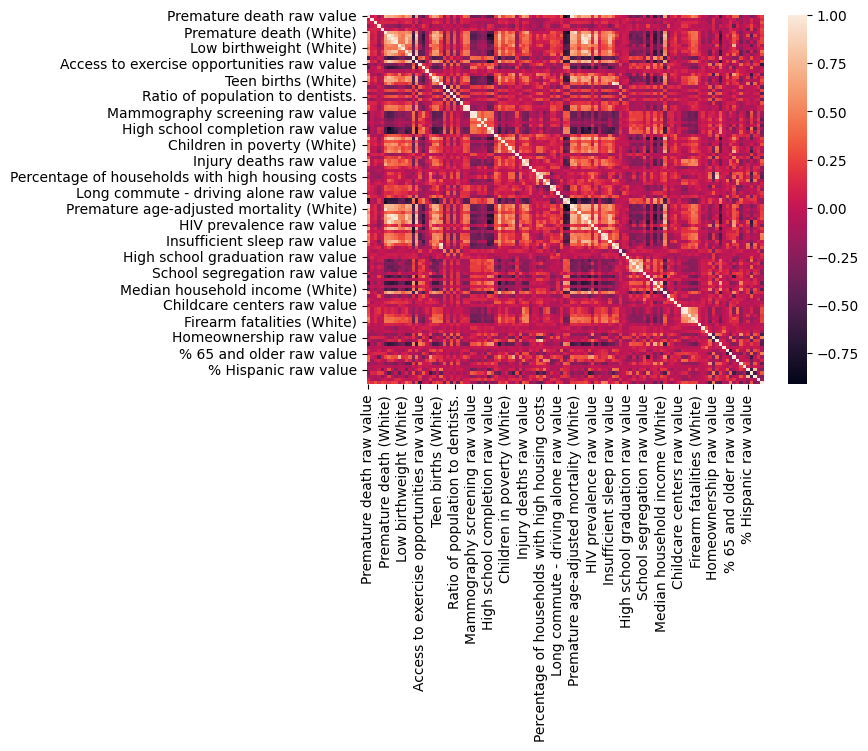

In [35]:
renamed_df = raw_numeric_chr_analytic_df.rename(VAR_DESCRIPTION_MAPPING, axis=1)

renamed_corr = renamed_df.corr(method="pearson", numeric_only=True)
sns.heatmap(renamed_corr)


30 variables most correlated with Preventable hospital stays raw value
v070_rawvalue        Physical inactivity raw value                      0.5235111447161737


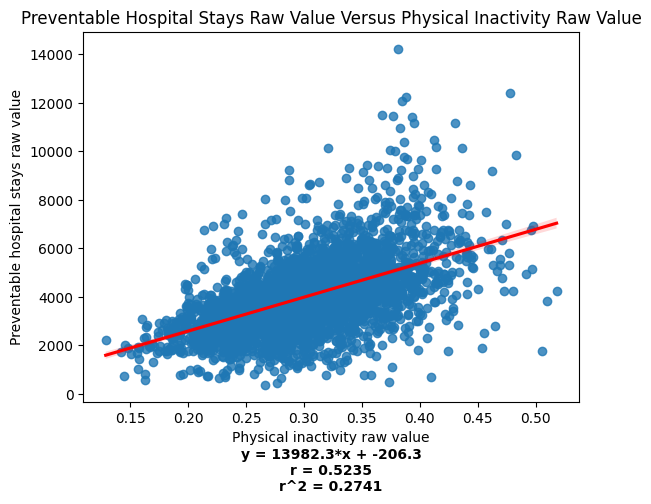

v143_rawvalue        Insufficient sleep raw value                       0.5024039210048926


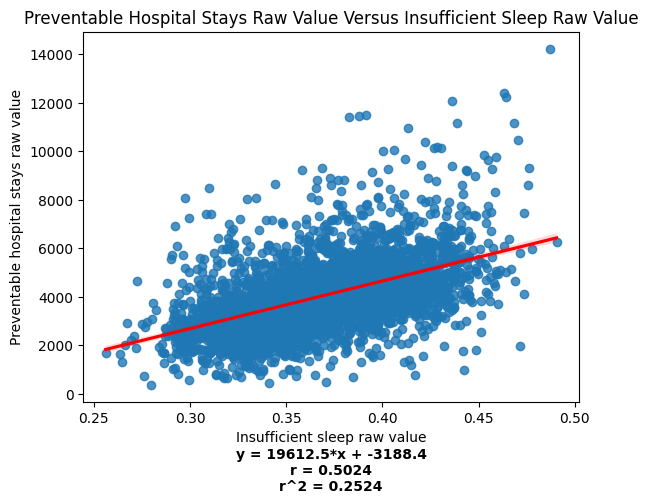

v002_rawvalue        Poor or fair health raw value                      0.4979982860343002


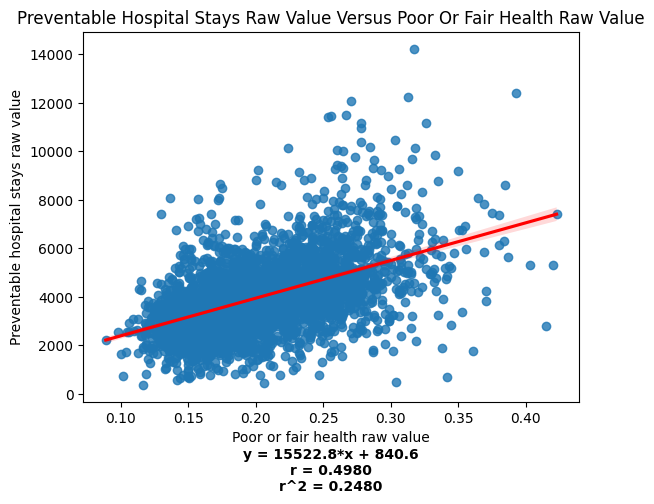

v127_rawvalue        Premature age-adjusted mortality raw value         0.49484496189542454


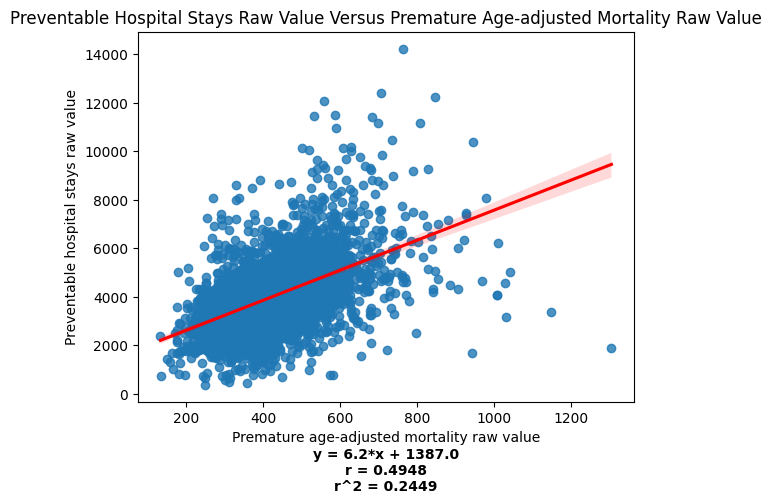

v127_race_white      Premature age-adjusted mortality (White)           0.4931289244547448


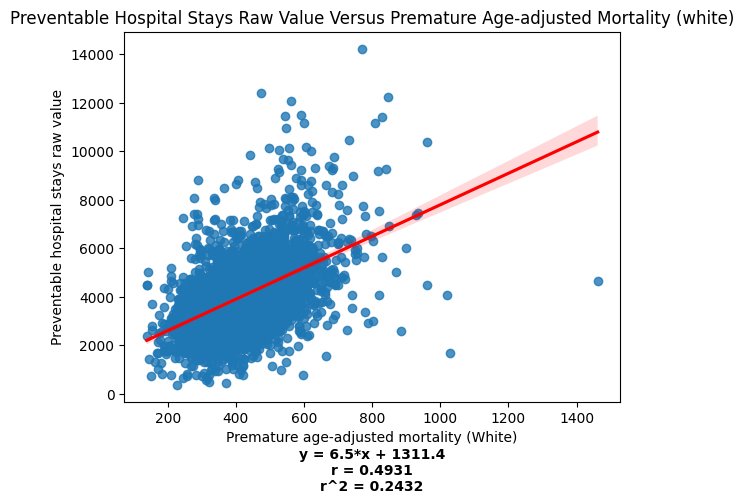

v144_rawvalue        Frequent physical distress raw value               0.49138592681476856


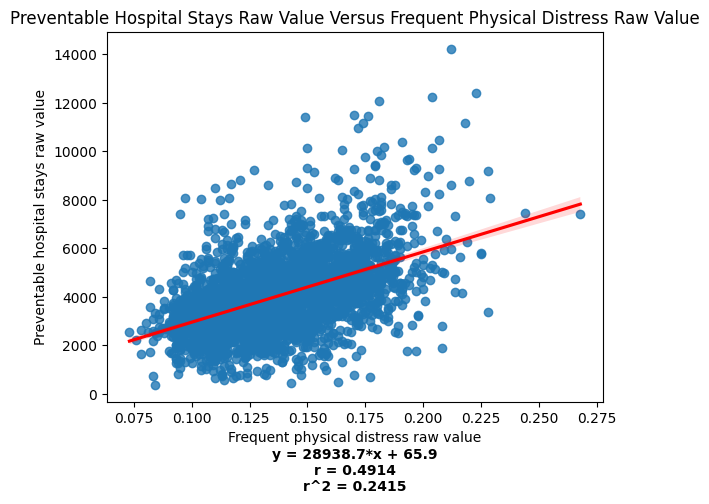

v145_rawvalue        Frequent mental distress raw value                 0.48994603243082313


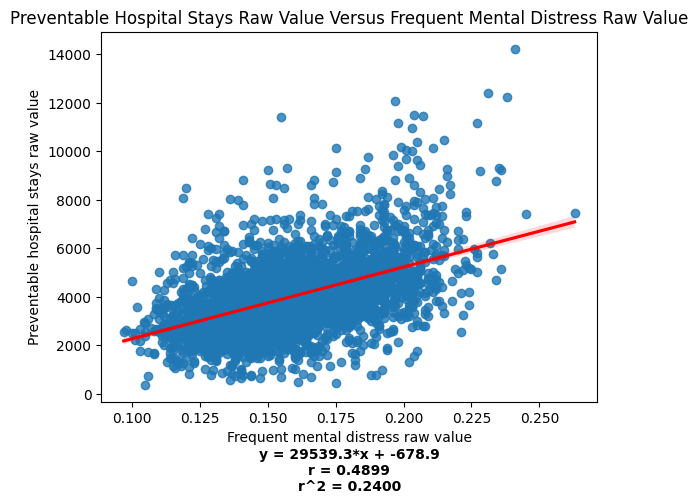

v147_rawvalue        Life expectancy raw value                          -0.4895396905556488


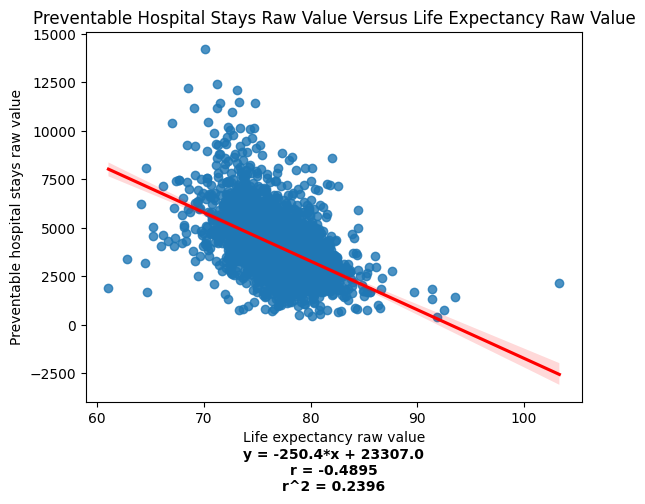

v009_rawvalue        Adult smoking raw value                            0.4838126486546718


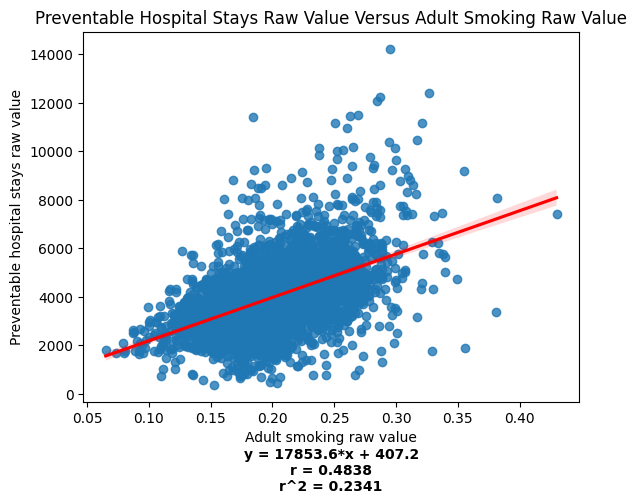

v036_rawvalue        Poor physical health days raw value                0.48242144868893233


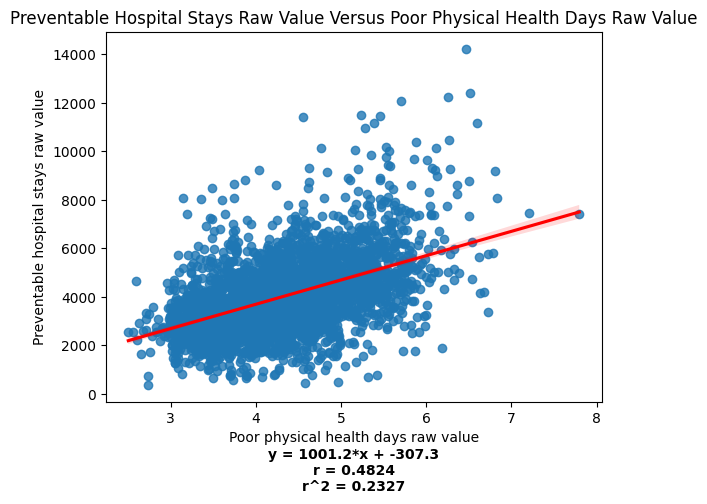

v042_rawvalue        Poor mental health days raw value                  0.4714007714508042


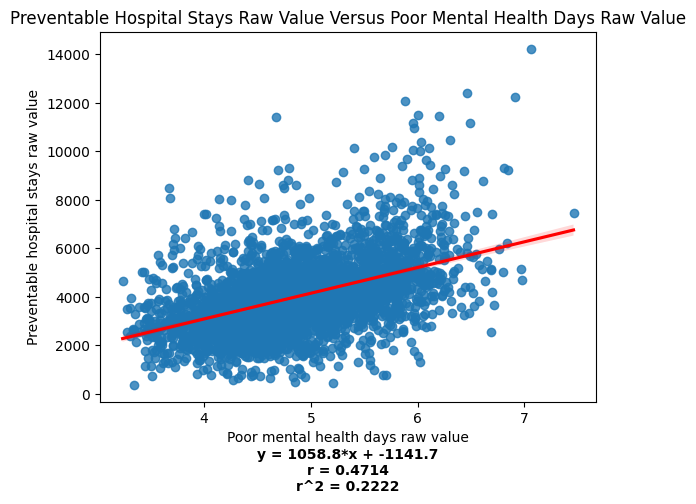

v060_rawvalue        Diabetes prevalence raw value                      0.4710724449369693


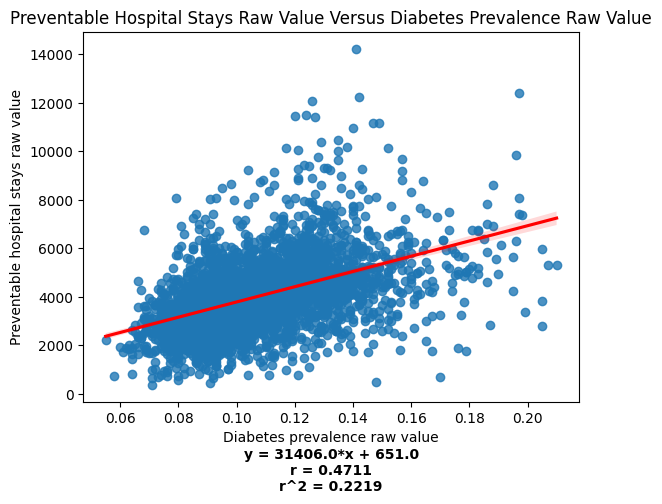

v011_rawvalue        Adult obesity raw value                            0.45647752114540346


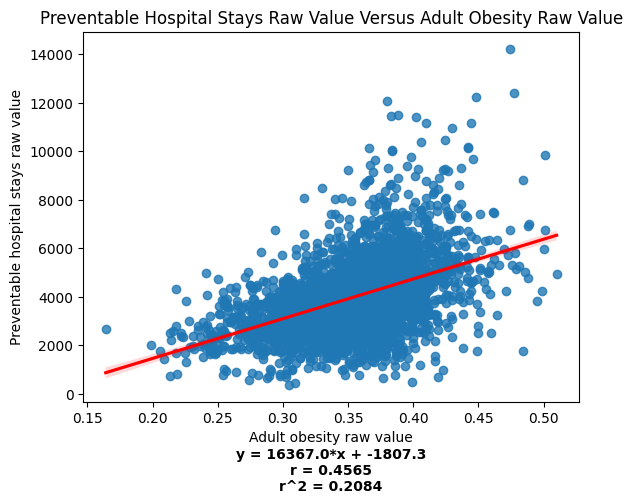

v147_race_white      Life expectancy (White)                            -0.45242173595445156


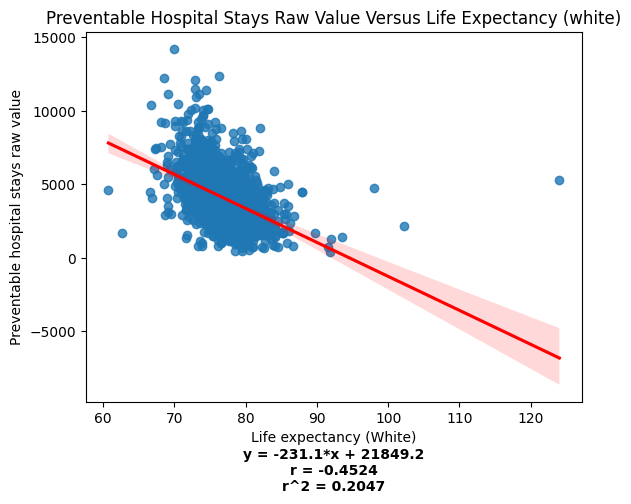

v014_race_white      Teen births (White)                                0.4391572258177424


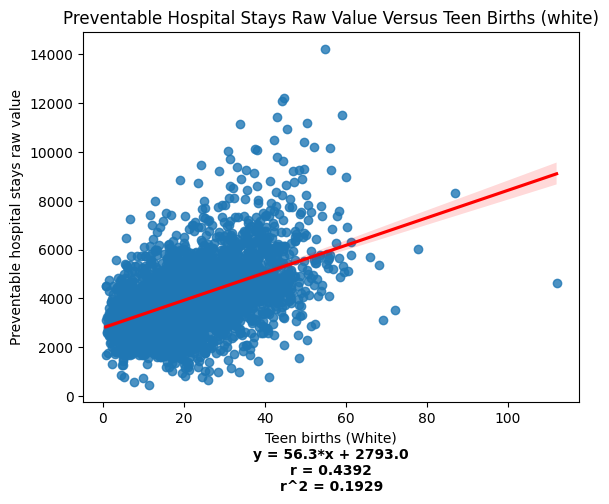

v024_rawvalue        Children in poverty raw value                      0.4269706700238748


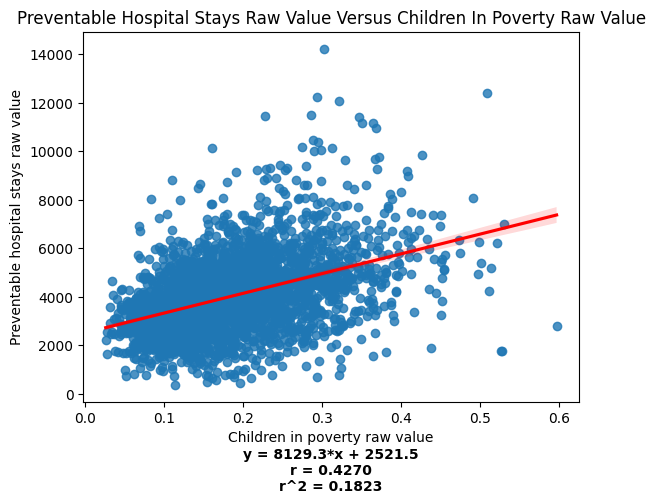

v139_rawvalue        Food insecurity raw value                          0.425077881042131


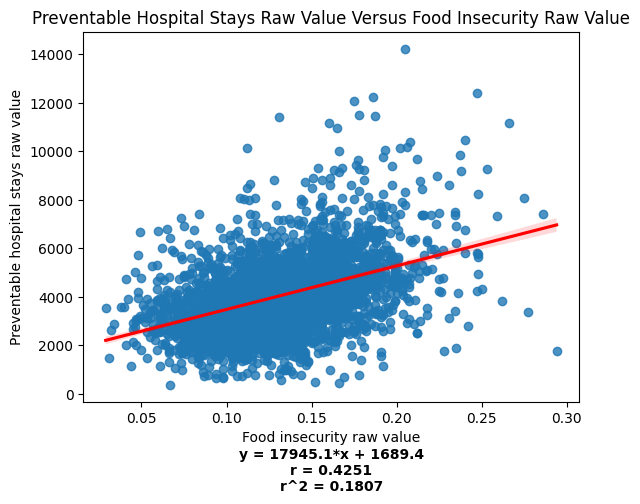

v014_rawvalue        Teen births raw value                              0.42110203885681274


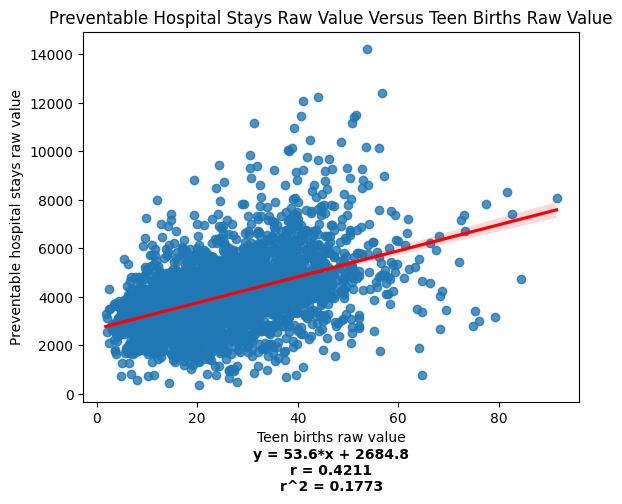

v001_rawvalue        Premature death raw value                          0.41728376229545394


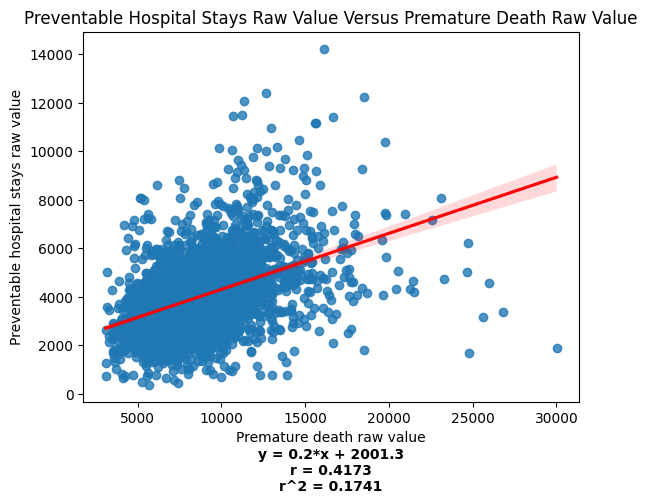

v001_race_white      Premature death (White)                            0.416993019550511


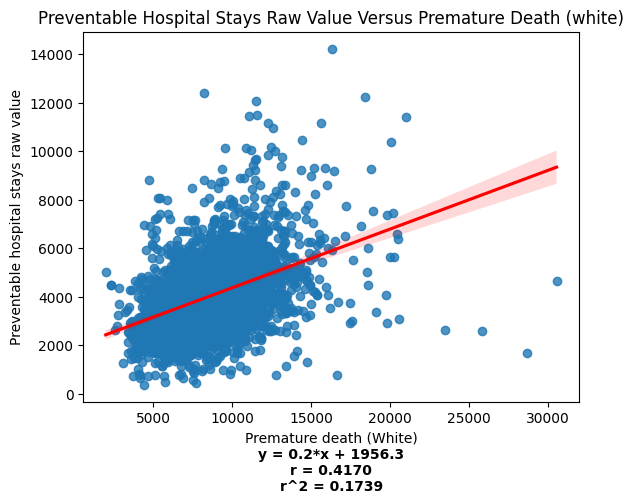

v168_rawvalue        High school completion raw value                   -0.3942673978372621


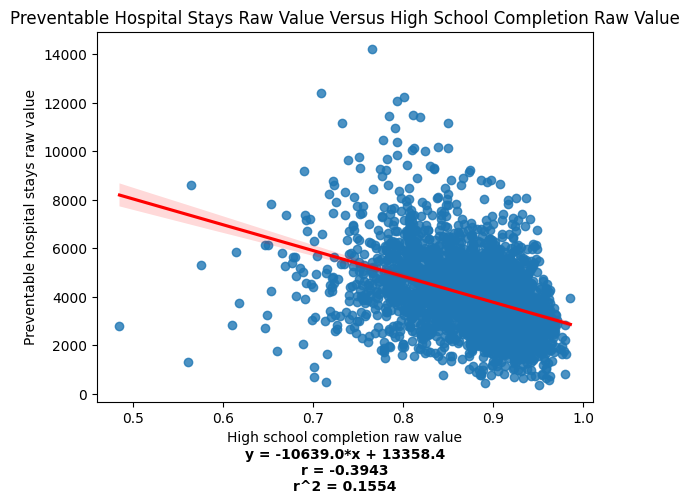

v065_rawvalue        Children eligible for free or reduced price lunch raw value 0.3598941660492575


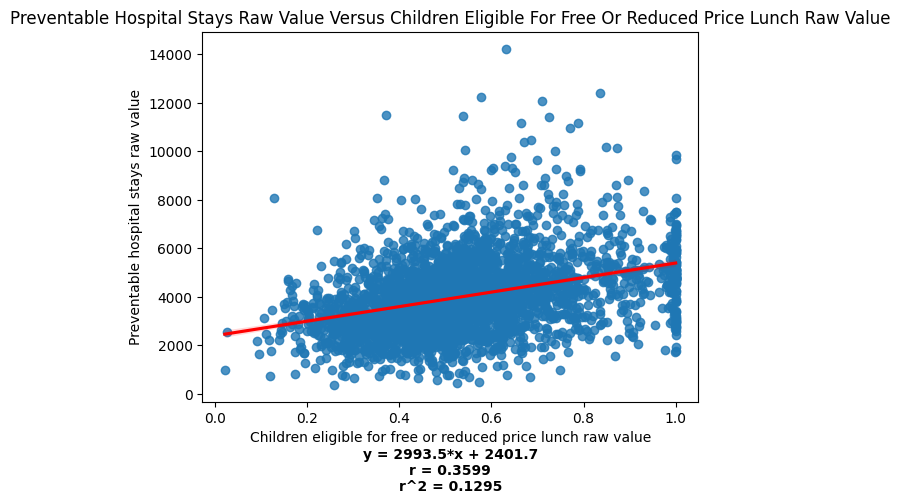

v037_rawvalue        Low birthweight raw value                          0.3588661061637423


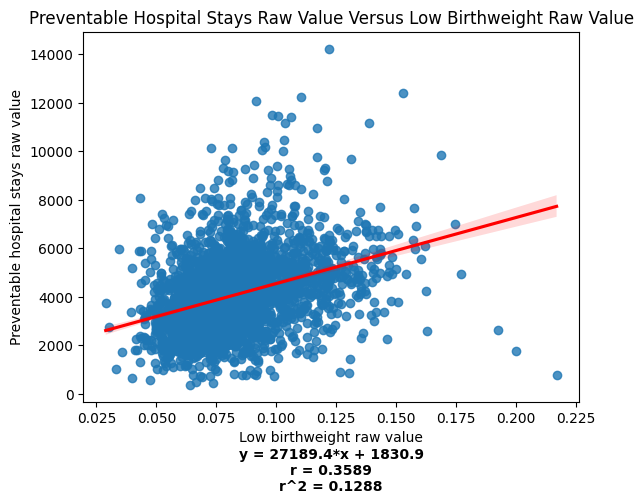

v049_rawvalue        Excessive drinking raw value                       -0.35739286611183


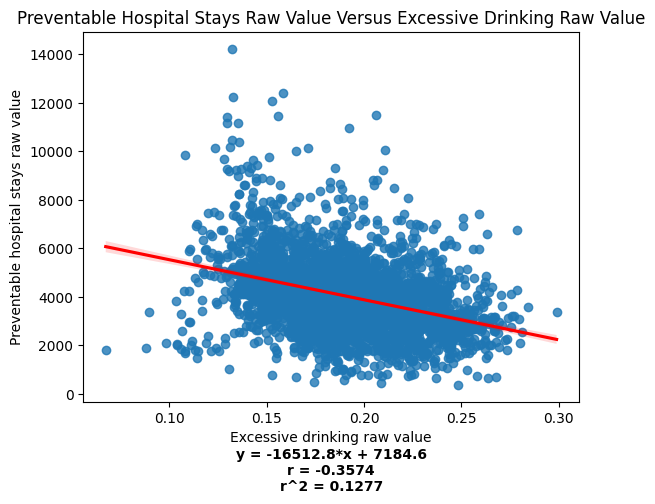

v063_rawvalue        Median household income raw value                  -0.35649449398185196


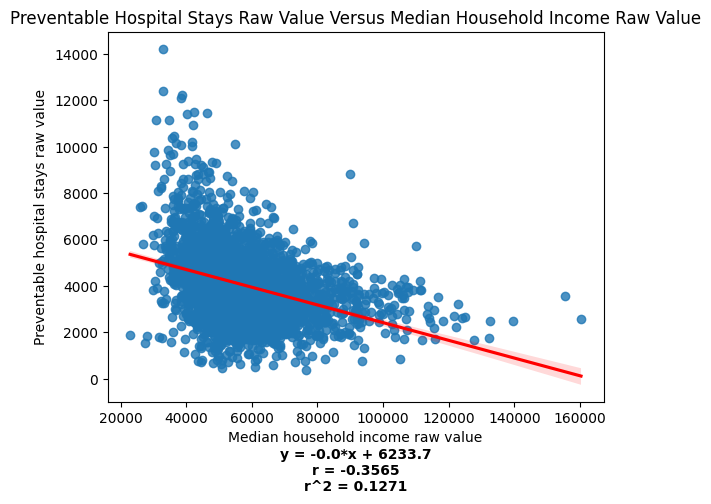

v069_rawvalue        Some college raw value                             -0.3482387815888371


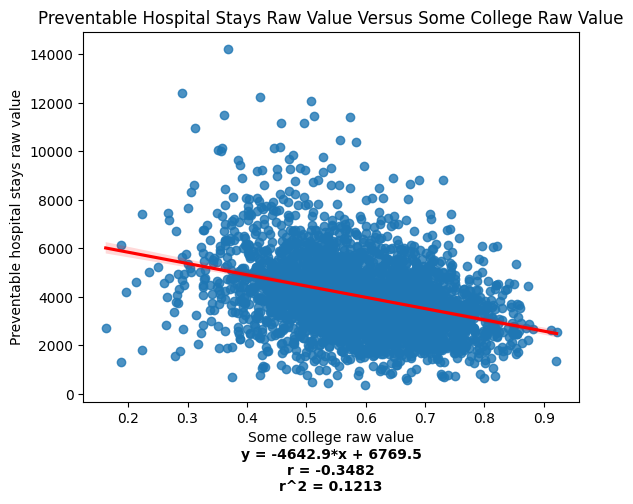

v166_rawvalue        Broadband access raw value                         -0.32798506383565673


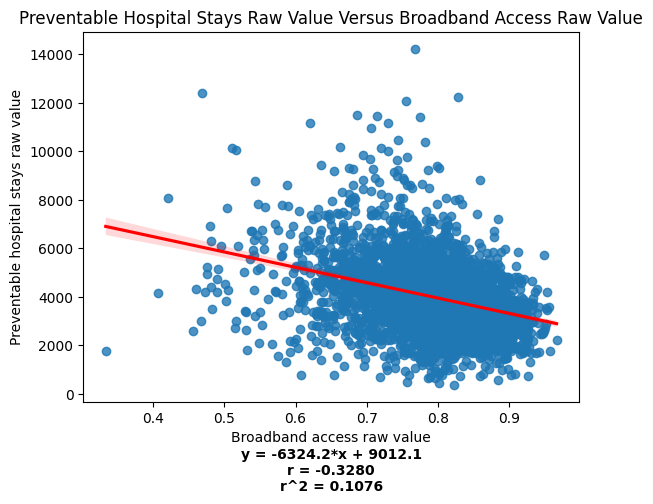

v082_rawvalue        Children in single-parent households raw value     0.3268211721035202


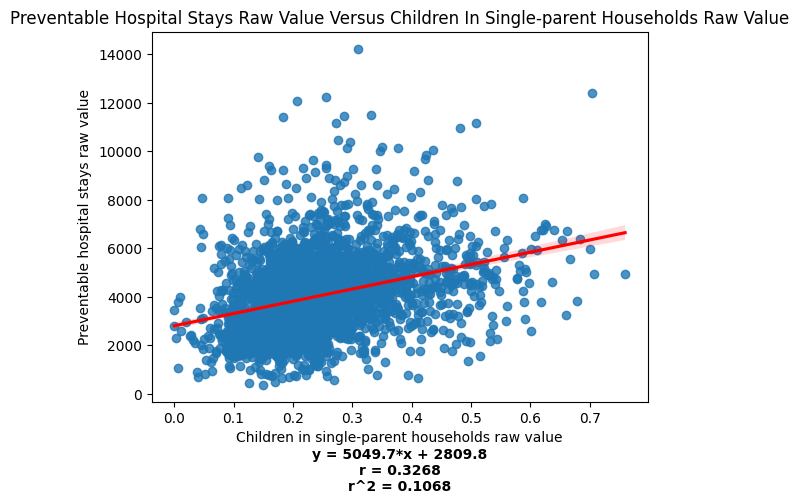

v169_rawvalue        School funding adequacy raw value                  -0.3132346426367902


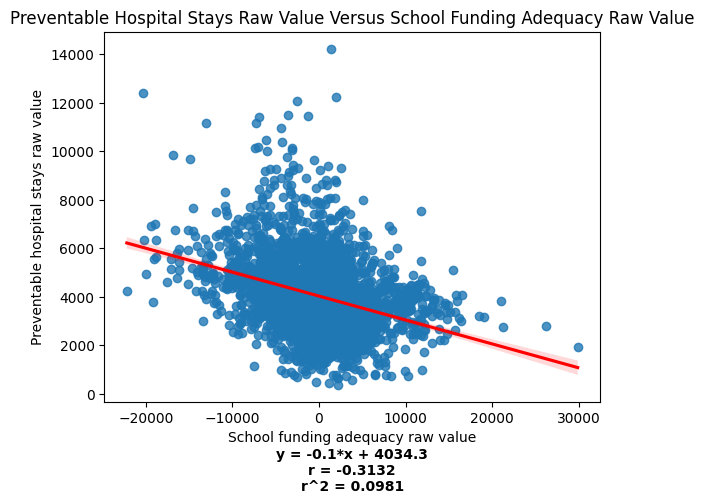

v024_race_white      Children in poverty (White)                        0.2961947913066632


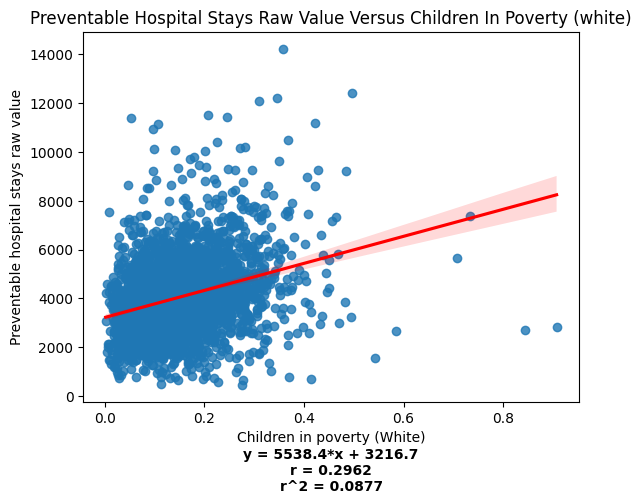

<Figure size 640x480 with 0 Axes>

In [36]:
# Create a series containing absolute value of correlations of rows to v005_rawvalue (Preventable hospital stays raw value)
absolute_correlations = abs(raw_corr["v005_rawvalue"])

# Remove rows with labels that contain v005, as these are also preventable hospital stays
for label, value in absolute_correlations.items():
    if "v005" in label:
        absolute_correlations.drop(label, inplace = True)

# Get the ten rows with the most correlation
N_most_correlated = 30
most_correlated = absolute_correlations.nlargest(N_most_correlated)
print(f"{N_most_correlated} variables most correlated with {VAR_DESCRIPTION_MAPPING['v005_rawvalue']}")
for label, value in most_correlated.items():
    print(label.ljust(20), VAR_DESCRIPTION_MAPPING[label].ljust(50), corr.loc["v005_rawvalue", label])
    scatter_plot = sns.regplot(x=chr_analytic_df[label], y=chr_analytic_df["v005_rawvalue"], line_kws = {"color":"red"})
    scatter_plot.set_xlabel(VAR_DESCRIPTION_MAPPING[label])
    scatter_plot.set_ylabel(VAR_DESCRIPTION_MAPPING["v005_rawvalue"])
    scatter_plot.set_title(string.capwords(f"{VAR_DESCRIPTION_MAPPING['v005_rawvalue']} versus {VAR_DESCRIPTION_MAPPING[label]}"))


    df = chr_analytic_df[ [label, "v005_rawvalue"] ].copy()
    df = df.dropna()
    a, b = np.polyfit(df[label], df["v005_rawvalue"], 1)
    
    equation_str = f"y = {a:.1f}*x + {b:.1f}\nr = {corr.loc['v005_rawvalue', label]:.4f}\nr^2 = {(corr.loc['v005_rawvalue', label]**2):.4f}" 
    plt.text(0.5, -0.25, equation_str, verticalalignment="bottom", horizontalalignment='center', transform=scatter_plot.transAxes, size='medium', color='black', weight='semibold')
    plt.show()
    plt.figure()